<a href="https://colab.research.google.com/github/matthewzelten/lab-1-phase-2-matthewzelten/blob/main/Copy_of_DATA_301_Lab_1B_Matthew_and_Vicky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

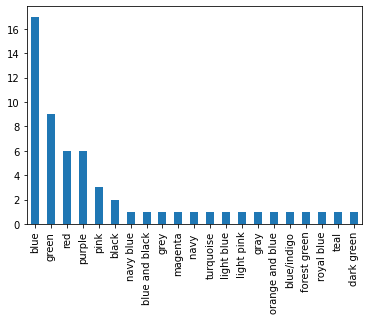

In [2]:
# TYPE YOUR CODE HERE.
import pandas as pd
url = "https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit#gid=970845822"
url = url.replace('/edit#gid=', '/export?format=csv&gid=') 
df_responses = pd.read_csv(url)

def toLowerCase(c):
  return c.lower()
df_responses["What is your favorite color?"] = df_responses["What is your favorite color?"].map(toLowerCase)
df_responses["What is your favorite color?"].value_counts().plot.bar()



**TYPE YOUR WRITTEN EXPLANATION HERE.**

From the data, we see the the modt popular color was blue followed by green ten purple. However, most of the colors were only specified once. One thing contributing to that is the fact that the bar chart is unable to parse the responses. For example, one response was blue/indigo which clearly wouldn't fit into any of the other categories even though it does have "blue" in it.

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

In [9]:
# TYPE YOUR CODE HERE.
siblings = df_responses.iloc[:,2]
slo = df_responses.iloc[:,1] 
sibling_living = pd.crosstab(siblings, slo, normalize=True)
temp = sibling_living.sum(axis=1)
sibling_living.divide(temp, axis=0)

Where are you living this quarter?,"Off Campus, but in SLO","Off Campus, outside of SLO",On-Campus housing
How many siblings do you have?,,,
0,0.20,0.80,0.0
1,0.64,0.36,0.0
2,0.55,0.35,0.1
3,0.40,0.60,0.0
5,0.00,1.00,0.0


**TYPE YOUR WRITTEN EXPLANATION HERE.**

Based on this data, it doesnt really appear that there is a relationship between how many siblings a student has and whether or not they live on campus. The data appears to be scattered.

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

In [ ]:
# TYPE YOUR CODE HERE.
balls = df_responses.iloc[:,5]
overall_mean = balls.mean()

df_fan = df_responses[df_responses.iloc[:,6] == "Yes"]
df_not_fan = df_responses[df_responses.iloc[:,6] == "No"]
sports = df_responses.iloc[:,6]

not_fan_mean = df_not_fan.iloc[:,5].mean()
fan_mean = df_fan.iloc[:,5].mean()

(overall_mean, fan_mean, not_fan_mean)

(968469.8831379311, 1445128.3045185187, 553315.7741935484)

**TYPE YOUR WRITTEN EXPLANATION HERE.**

The overall mean for the data set was 968,469 balls. However, when you split up the guesses into sports fans and not sports fans, the results are very different. Sports fans guessed an average of 1,445,128 while non sports fans guessed an average of 553,315. The sports fans averaged far higher guesses.

## Question 4

Write and answer your own question using this data set.

Calculate the join distribution of a student being a sports fan and enjoying video games. What are the chances of someone liking videogames given that they like sports?

In [10]:
# TYPE YOUR CODE HERE.

joint_gamer_sports = pd.crosstab(df_responses.iloc[:,6], df_responses.iloc[:,7], normalize=True)
gamer_dist = joint_gamer_sports.sum(axis = 1)
joint_gamer_sports.divide(gamer_dist, axis=0)

Do you enjoy video games?,No,Yes
Do you consider yourself a sports fan?,,
No,0.225806,0.774194
Yes,0.222222,0.777778
